In [9]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load data
df = pd.read_csv('../data/raw/OnlineRetail.csv', encoding='ISO-8859-1')

In [11]:
# Handle missing values and filter data
df = df.dropna(subset=['CustomerID'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

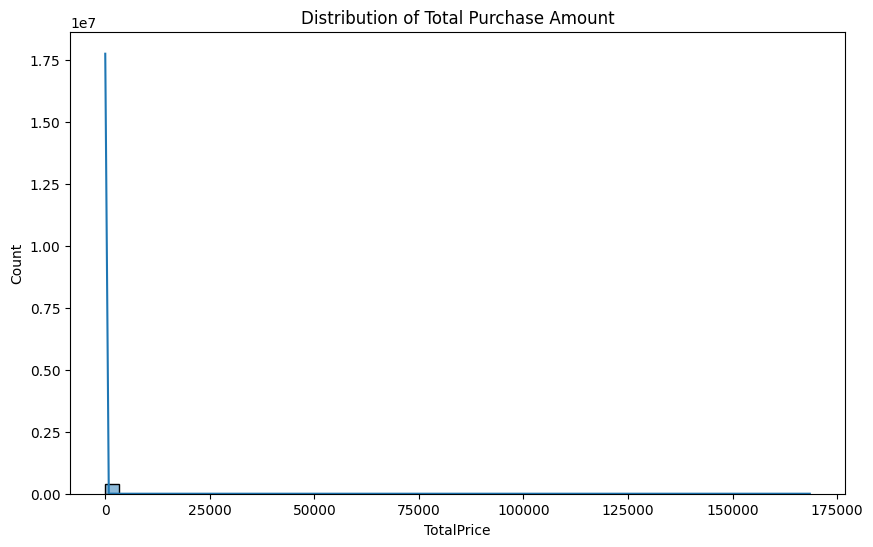

In [14]:
# Create TotalPrice feature
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Plot distribution of TotalPrice
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Total Purchase Amount')

# Save the plot as a JPG file in the images folder
plt.savefig('../images/total_purchase_distribution.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [13]:
# Group by CustomerID and perform summary statistics
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',    # Number of purchases
    'Quantity': 'sum',       # Total items purchased
    'TotalPrice': 'sum'      # Total money spent
}).rename(columns={'InvoiceNo': 'NumPurchases', 'Quantity': 'TotalQuantity'})

customer_data.describe()

,NumPurchases,TotalQuantity,TotalPrice
count,4338.000000,4338.000000,4338.000000
mean,91.720609,1191.289073,2054.266460
std,228.785094,5046.081546,8989.230441
min,1.000000,1.000000,3.750000
25%,17.000000,160.000000,307.415000
50%,41.000000,379.000000,674.485000
75%,100.000000,992.750000,1661.740000
max,7847.000000,196915.000000,280206.020000
